#  Rosenbrock function
---
Description:

- Optimization (min)
- Single-objective
- Constraints (1)
---

The general equation is given by:

- $f(x, y) = (1 - x)^2 + 100(y - x^2)^2$, with $-1.5 \le x \le +1.5$ and $-1.5 \le y \le +1.5$.

The problem here is that we are trying to minimize this function subject to the following constraint:

- $x^2 + y^2 \le 2$.

To do this we apply the [Penalty method](https://en.wikipedia.org/wiki/Penalty_method). Within this setting the global minimum is found at:

$\hat{f}(1.0, 1.0) = 0.0$.

### First we import python libraries and set up the directory of our code.

In [3]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('..')
sys.path.append(PROJECT_DIR)

### Here we import all our custom GA code.

In [5]:
# Import main classes.
from pygenalgo.genome.gene import Gene
from pygenalgo.genome.chromosome import Chromosome
from pygenalgo.engines.standard_ga import StandardGA

# Import Selection Operator(s).
from pygenalgo.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operator(s).
from pygenalgo.operators.crossover.uniform_crossover import UniformCrossover

# Import Mutation Operator(s).
from pygenalgo.operators.mutation.random_mutator import RandomMutator

### Define the Rosebrock function, which plays also the role of the 'fitness' function.

In addition, we define the 'rand_fx' which takes the role of the 'random()' method of the Genes. Every time we
want to 'mutate' a gene this function will be called that returns 'valid', but random values for the gene.

In [7]:
# Rosenbrock function.
def fun_Rosenbrock(individual: Chromosome, f_min: bool = True):
    
    # Penalty coefficient.
    p_coeff = 0.45
    
    # Extract the data values as 'x' and 'y', for parsimony.
    x, y = [gene.datum for gene in individual.genome]
    
    # Compute the function value.
    f_val = (1.0 - x)**2 + 100.0*(y - x**2)**2
    
    # Compute the constraint.
    f_const = p_coeff*max(0.0, x**2 + y**2 - 2.0)**2
    
    # NOTE: the constraint is added with the penalty coefficient.
    return -(f_val + f_const) if f_min else f_val
# _end_def_

# Random function: ~U(-1.5, +1.5).
rand_fx = lambda: np.random.uniform(-1.5, +1.5)

Here we set the GA parameters, such as number of genes, number of chromosomes, etc. Note that in this case each
gene has the same random() function (set by 'rand_fx'). But if the problem demands otherwise it is easy to set a 
different random() function for each gene.

In [9]:
# Define the number of chromosomes.
N = 100

# Initial population.
population = [Chromosome([Gene(np.random.normal(), rand_fx),
                          Gene(np.random.normal(), rand_fx)], np.nan, True)
              for _ in range(N)]

# Create the StandardGA object that will carry on the optimization.
toy_GA = StandardGA(initial_pop=population,
                    fit_func=fun_Rosenbrock,
                    select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(0.12),
                    cross_op=UniformCrossover())

### Optimization process.

Here we call the GA object (either directly, or through the method run()). We set a number of parameter,
such as the maximum iterations (i.e. epochs), tolerance for the fitness convergences, etc.

In [11]:
toy_GA(epochs=10000, elitism=True, verbose=False)

Initial Avg. Fitness = -488.0927.
Final   Avg. Fitness = -17.0469.
Elapsed time: 65.333 seconds.


In [12]:
# Extract the optimal solution from the GA.
optimal_solution = toy_GA.best_chromosome()

# Display the (final) optimal value.
print(f"Minimum Found: {fun_Rosenbrock(optimal_solution, f_min=False):.5f}\n")

# Display each gene value separately.
for i, xi in enumerate(optimal_solution.genome):
    print(f"x{i} = {xi.datum:.5f}")
# _end_for_

# True minimum: f(1.0, 1.0) = 0.0

Minimum Found: 0.00049

x0 = 0.97791
x1 = 0.95616


In [13]:
# If we want we can also print some operator statistics.
toy_GA.print_operator_stats()

 LinearRankSelector: (140384078554960)
 _probability: 1.0
 _counter: 10000
 _lock: <unlocked _thread.lock object at 0x7fadb7538f40>

 UniformCrossover: (140384078850512)
 _probability: 0.9
 _counter: 449859
 _lock: <unlocked _thread.lock object at 0x7fadb6f3cf80>

 RandomMutator: (140384031054464)
 _probability: 0.12
 _counter: 119536
 _lock: <unlocked _thread.lock object at 0x7fadb751f8c0>



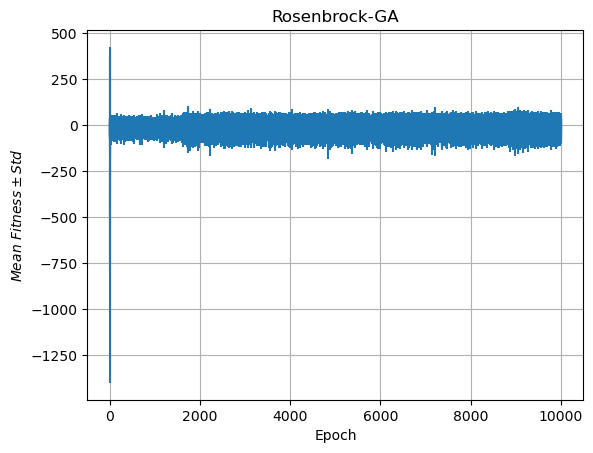

In [14]:
# Plot the average (population) fitness along with its spread (std)
# as function of the epochs.
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'])

plt.grid(True)
plt.title("Rosenbrock-GA")
plt.xlabel("Epoch")
plt.ylabel("$Mean~Fitness \pm Std$");

### End of file